In [1]:
import requests
import pandas as pd
headers = {
    'user-agent': 'my-app'
}


def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        allin = []
        for t in ['AMZN','NFLX', 'AAPL', 'TSLA']:
            params = {
                't': t
            }
            r = req.get(url, params=params)
            df = pd.read_html(r.content, attrs={'id': 'news-table'})[0]
            df[2] = t
            allin.append(df)
        df = pd.concat(allin, ignore_index=True)
        #print(df[2])
        df.to_csv('data.csv', index=False)

main('https://finviz.com/quote.ashx')

In [2]:
df = pd.read_csv('data.csv', usecols=[0,1,2], names=['date_time', 'title','ticker'])
# drop first row
df.head(2)

,date_time,title,ticker
0,0,1,2
1,Jan-17-23 01:18PM,"Amazon will not cut jobs in Italy, unions say ...",AMZN


In [3]:
day = 0 #define to be used in loop
time = 0 #defined to be used in loop
print(day)

parsed_data = []
for i, row in df.iterrows():
    title = df['title'].iloc[i]
    ticker = df['ticker'].iloc[i]
    date_data = df.iloc[i][0].split(' ')
    if len(date_data) == 2:
        day = date_data[0]
        time = date_data[1]
    else:
        time = date_data[0]

    parsed_data.append([day, time, ticker, title])

clean_df = pd.DataFrame(parsed_data, columns=['date', 'time', 'ticker', 'title'])
print(clean_df)

0
          date     time ticker  \
0            0        0      2   
1    Jan-17-23  01:18PM   AMZN   
2    Jan-17-23  11:30AM   AMZN   
3    Jan-17-23  11:00AM   AMZN   
4    Jan-17-23  10:38AM   AMZN   
..         ...      ...    ...   
408  Jan-13-23  12:28PM   TSLA   
409  Jan-13-23  12:27PM   TSLA   
410  Jan-13-23  12:23PM   TSLA   
411  Jan-13-23  12:19PM   TSLA   
412  Jan-13-23  12:07PM   TSLA   

                                                 title  
0                                                    1  
1    Amazon will not cut jobs in Italy, unions say ...  
2    IMDb Brings Coverage of the Sundance Film Fest...  
3    3 Reasons Amazon Stock Is a No-Brainer Buy in ...  
4    WWE stock upgraded at Wells Fargo as analysts ...  
..                                                 ...  
408  Top Wall Street Analyst Reacts to Tesla's Majo...  
409  Why Rivian, GM, and Ford Stocks Fell on Tesla'...  
410  Stock Market Rally Gains Steam As Inflation Co...  
411  Tesla Plunges 

In [4]:
clean_df.to_csv('clean_data.csv', index=False)
data=pd.read_csv('clean_data.csv')

In [5]:
data #not sure why title and ticker changed
data.drop(index=data.index[0], axis=0, inplace=True)

In [6]:
# """apply sentiment analysis"""
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
data['compound'] = data['title'].apply(f)
data['date'] = pd.to_datetime(data['date']).dt.date


In [7]:
data.head(2)

,date,time,ticker,title,compound
1,2023-01-17,01:18PM,AMZN,"Amazon will not cut jobs in Italy, unions say ...",0.3641
2,2023-01-17,11:30AM,AMZN,IMDb Brings Coverage of the Sundance Film Fest...,0.7184


<Figure size 10000x8000 with 0 Axes>

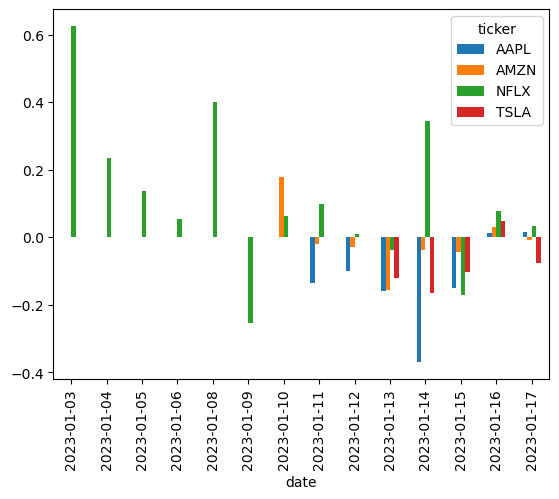

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,80))
mean_df = data.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()